In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [337]:
#Leemos el archivo

archivo = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(archivo)

In [338]:
# 1ro
# La aplicación debe recibir del usuario el nombre del país deseado y graficar casos detectados y
# fallecimientos totales para ese país en función del tiempo

In [339]:
a = df[df['location']== 'Argentina']
a.head(3)

,date,location,new_cases,new_deaths,total_cases,total_deaths
482,2020-03-04,Argentina,1,0,1,0
483,2020-03-06,Argentina,1,0,2,0
484,2020-03-07,Argentina,6,0,8,0


In [340]:
def graficar_pais(pais):
    
    """Ingrese el nombre del pais"""
    
    
    datos = df[df['location'] == pais] # Guardo la parte de la tabla que corresponde al pais solicitado
    
    x = datos['date']
    yc = datos['total_cases'] 
    yd = datos['total_deaths']
    
    
    plt.figure(figsize=(18, 6))
    plt.title(pais)
    plt.plot(x, yc, 'b--',label='Casos detectados')  # grafico casos detectados
    plt.plot(x,yd,'k',label='Fallecidos')  # grafico fallecidos
    
    plt.xlabel('Fecha')
    
    
    plt.legend()
    plt.xticks(rotation=60)
    
    plt.show()
    
    

    
    
    

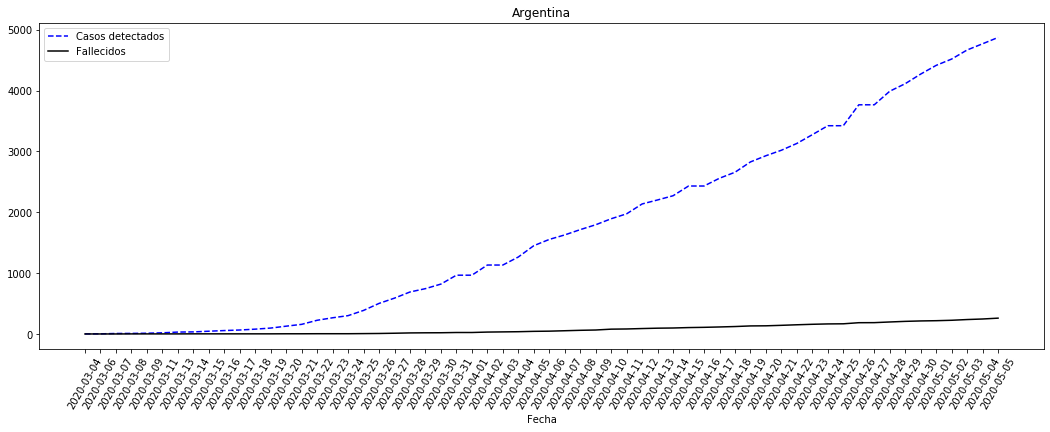

In [341]:
graficar_pais('Argentina')

In [342]:
#2do
#Pedir al usuario ingresar dos paises y gráficar para dichos países la cantidad de casos y fallecimientos 
#en dos gráfico con etiquetas, el usuario debe ingresar el intervalo de tiempo a graficar. Calcular las intersecciónes
#entre graficos si las hubiera y marcarlas con un punto.

In [343]:
#Primero defino una funcion con 2 fechas de argumento que devuelva el listado de todos los dias entremedio.
#para esto importo el datetime

from datetime import datetime, timedelta


def listado_fechas(fecha_inicial,fecha_final):
    
    #Me fijo que la fecha inicial se anterior a la fecha final
    
    if fecha_inicial > fecha_final:
        return 'Ingresa la fecha inicial primero'

    #inicio el listado de fechas
    lista_de_fechas = []
    
    #Convierto las fechas de string a objetos de tipo datetime 
    fecha_i = datetime.strptime(fecha_inicial , '%Y-%m-%d')
    fecha_f = datetime.strptime(fecha_final , '%Y-%m-%d')

    dia_agregar= fecha_i

    while dia_agregar != fecha_f  + timedelta(days = 1):

        
        
        #Me fijo si tengo que agregar o no un cero a los dias o meses
        dia = str(dia_agregar.year) + '-'

        if dia_agregar.month <= 9:
            dia += '0'+str(dia_agregar.month) + '-'
        else:
            dia += str(dia.month) + '-'

        if dia_agregar.day <= 9:
            dia += '0'+str(dia_agregar.day)
        else:
            dia += str(dia_agregar.day) 

         # Agrego la fecha a la lista
        lista_de_fechas.append(dia) 

        

        dia_agregar = dia_agregar + timedelta(days = 1)


    return lista_de_fechas
    


In [344]:
#pruebo la funcion

x = listado_fechas('2020-03-26', '2020-04-1')

print(x)

['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01']


In [345]:
#Defino la funcion para la interseccion de las curvas


def intersecciones(lista1, lista2):
    # Inicio lista de intersecciones
    intersec = []
    
    
    #hago este while para empezar  a evaluar intersecciones en un indice donde no haya None en ninguna de las 2 listas
    lista_sup = None
    i = 0
    while lista_sup == None:
        if arg[i]== None or col[i] == None:
            i += 1
            continue

    
        #inicio lista superior y lista inferior
        if lista1[i]> lista2[i]:
            lista_sup = lista1
            lista_inf = lista2

        else:
            lista_sup = lista2
            lista_inf = lista1  
    
    #Recorro ambas listas
    for x in range(len(lista1)-1):
        
        #descarto los datos hay un None
        if lista_sup[x] == None or lista_inf[x] == None:
            continue
    
    
        # Si la lista inferior supera a la superior
        
        if lista_sup[x] < lista_inf[x]:

            #Agrego la interseccion calculando el promedio y el indice
            intersec.append(((lista_sup[x] + lista_inf[x])//2, x ))
            
            #intercambio las listas
            lista_sup , lista_inf = lista_inf, lista_sup
                   
    
    return intersec
        
    

In [346]:
def comparar(pais1, pais2, fecha_inicial, fecha_final):
    
    """Nombre del pais 1 , nombre del pais 2 , fecha inicial , fecha final"""
    
    fechas = listado_fechas(fecha_inicial, fecha_final)
    
    
    
    # Guardo la parte de la tabla que corresponde al 1er pais solicitado
    datos1 = df[df['location'] == pais1] 
    
    
    # Guardo la parte de la tabla que corresponde al 1er pais solicitado
    datos2 = df[df['location'] == pais2] 
 
    
    #Inicio listas para casos y fallecidos de cada pais
    
    casos1=[]
    fallecidos1 =[]
    casos2=[]
    fallecidos2 =[]     
       
        
    for dia in fechas:
            
        #Guardo las listas de fallecidos y cantidad de casos para el pais 1   
        
        c1 = datos1[datos1['date'] == dia]['total_cases']
        f1 = datos1[ datos1['date'] == dia ]['total_deaths']    
        
        #Guardo las listas de fallecidos y cantidad de casos para el pais 2   
        
        
        c2 = datos2[datos2['date'] == dia]['total_cases']
        f2 = datos2[ datos2['date'] == dia ]['total_deaths']  
        
        # Para pasar los  fallecidos y casos de cada pais a una lista hago dos cosas:
        #  1_Si la fila de una  fecha pedidas no esta cargada en la base de datos le asigno valor None
        #  2_Las filas cargadas las convierto de series de panda a enteros 
        
        if len(c1) == 0:
            casos1.append(None)
        else:
            casos1.append(int(c1))
            
        if len(f1) == 0:
            fallecidos1.append(None)
        else:
            fallecidos1.append(int(f1))
                          
        if len(c2) == 0:
            casos2.append(None)
        else:
            casos2.append(int(c2))
                          
        if len(f2) == 0:
            fallecidos2.append(None)
        else:
            fallecidos2.append(int(f2))
        
        
    #para chequear que los datos de cada pais
    #print('CASOS 1')
    #print(casos1)
    #print('CASOS 1 FIN')
    
    #print('CASOS 2')
    #print(casos2)
    #print('CASOS 2 FIN')
    
    # Intersecciones Casos
    inter_casos = intersecciones(casos1,casos2)
    # Intersecciones fallecidos
    inter_fallecimientos = intersecciones(fallecidos1,fallecidos2)
    
        
              #GRAFICOS
    
    plt.figure(figsize=(18, 6))
    #grafico Casos
    plt.subplot(1, 2, 1)
   
    plt.plot(fechas ,casos1 , 'r--',label='Casos detectados en '+ pais1)  # Pais 1
    plt.plot(fechas, casos2 , 'g--',label='Casos detectados en '+ pais2)  # Pais 2
    #intersecciones 
    for (x,y) in inter_casos:
        plt.plot(fechas[y],x,'bo')
    
    plt.title('Casos confirmados en ' + pais1 + ' y ' + pais2)
    plt.xlabel('Fecha')
    plt.legend()
    plt.xticks(rotation=70)
    
    
    #grafico Fallecidos
    plt.subplot(1, 2, 2)
    
    plt.plot(fechas,fallecidos1 ,'r',label='Fallecidos en ' + pais1)  # Pais 1 
    plt.plot(fechas, fallecidos2 ,'g',label='Fallecidos en ' + pais2)  # Pais 2
    #intersecciones
    for (x,y) in inter_fallecimientos :
        plt.plot(fechas[y], x ,'bo')
    
    plt.title('Fallecidos en ' + pais1 + ' y ' + pais2)
    plt.xlabel('Fecha')
    plt.legend()
    plt.xticks(rotation= 70)
    
    
    
    plt.show()

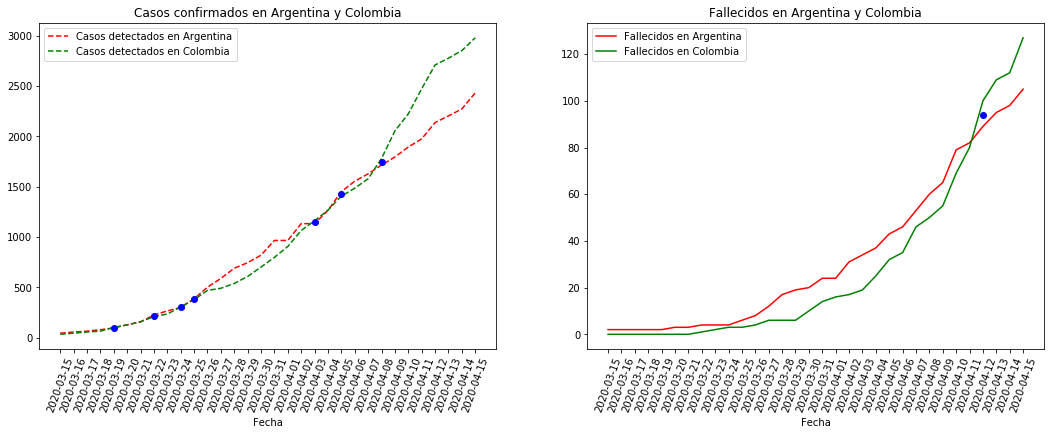

In [347]:
#Pruebo la funcion
comparar('Argentina','Colombia','2020-03-15', '2020-04-15')

In [348]:
#3ro
#Pedir al usuario ingresar n países y gráficar para dichos países la cantidad de casos en una escala logaritmica. 
#El programa debe pedirle al usuario el intervalo de tiempo

In [349]:
#importo pyplot para la escala logaritmica
#Podria haberlo hecho con np.log10() pero al tener valores None se volvia mas engorroso 
from matplotlib import pyplot

def graficar_paises(lista_paises,fecha_inicial,fecha_final):
    
    """ Lista o set con los paises que se quiera graficas, fecha inicial , feche final"""
    
    fechas = listado_fechas(fecha_inicial, fecha_final)
    
    
    plt.figure(figsize=(18, 6))
    plt.title('Casos en escala logaritmica')    
    plt.xlabel('Fecha')
    plt.ylabel('Casos positivos')
    
    
    for pais in lista_paises:
        # Guardo la parte de la tabla que corresponde al  pais solicitado
        datos = df[df['location'] == pais] 
    

        

        #Inicio listas para casos y fallecidos de cada pais

        casos=[]
        fallecidos =[]     
        
        for dia in fechas:
            
            #Guardo las listas de fallecidos y cantidad   

            c = datos[datos['date'] == dia]['total_cases']



            # Para pasar los  fallecidos y casos de cada pais a una lista hago dos cosas:
            #  1_Si la fila de una  fecha pedidas no esta cargada en la base de datos le asigno valor None
            #  2_Las filas cargadas las convierto de series de panda a enteros 

            if len(c) == 0:
                casos.append(None)
            else:
                casos.append(int(c))


        
        plt.plot(fechas ,casos,'-' ,label='Casos detectados en '+ pais) 
        plt.legend()
        
        
        
    
    pyplot.yscale('log')
    plt.xticks(rotation= 70)
    
    plt.show()



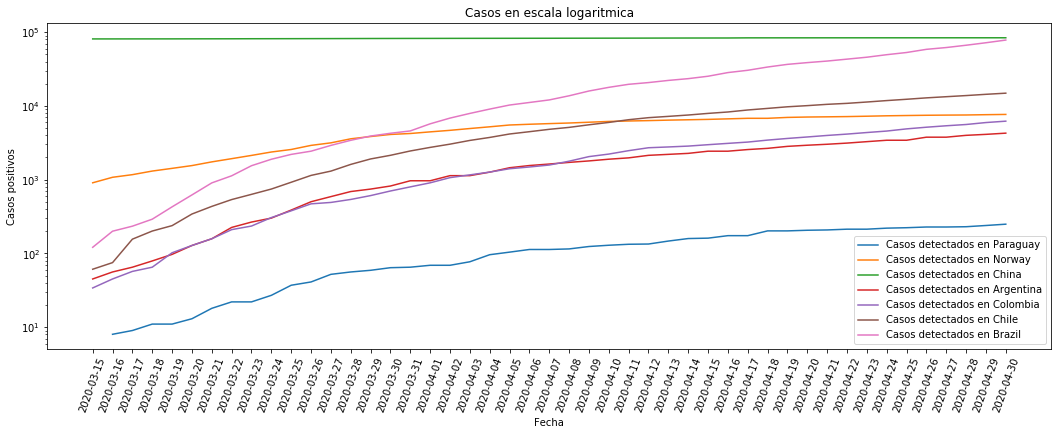

In [350]:
#pruebo la funcion

graficar_paises(['Paraguay','Norway','China','Argentina','Colombia','Chile','Brazil'],'2020-03-15', '2020-04-30')

In [ ]:
# En Resumen

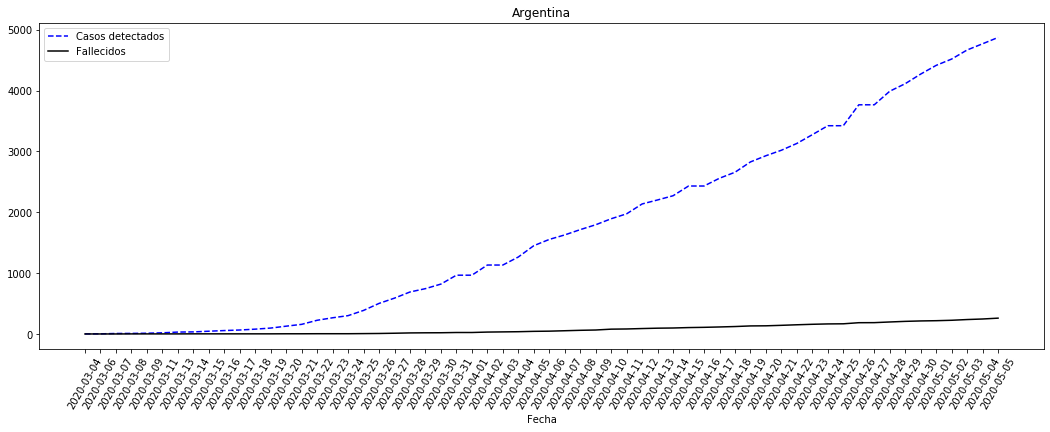

In [351]:
# 1ro
# La aplicación debe recibir del usuario el nombre del país deseado y graficar casos detectados y
# fallecimientos totales para ese país en función del tiempo

graficar_pais('Argentina')




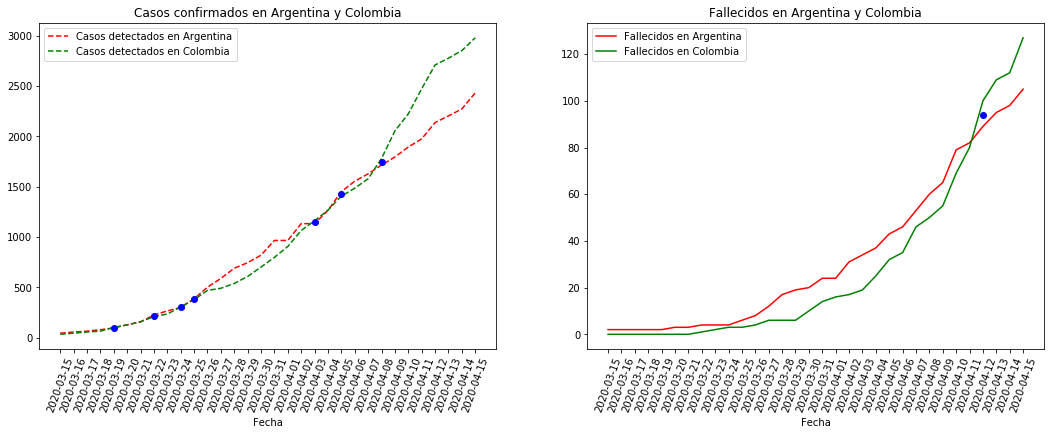

In [352]:
#2do
#Pedir al usuario ingresar dos paises y gráficar para dichos países la cantidad de casos y fallecimientos 
#en dos gráfico con etiquetas, el usuario debe ingresar el intervalo de tiempo a graficar. Calcular las intersecciónes
#entre graficos si las hubiera y marcarlas con un punto.
comparar('Argentina','Colombia','2020-03-15', '2020-04-15')

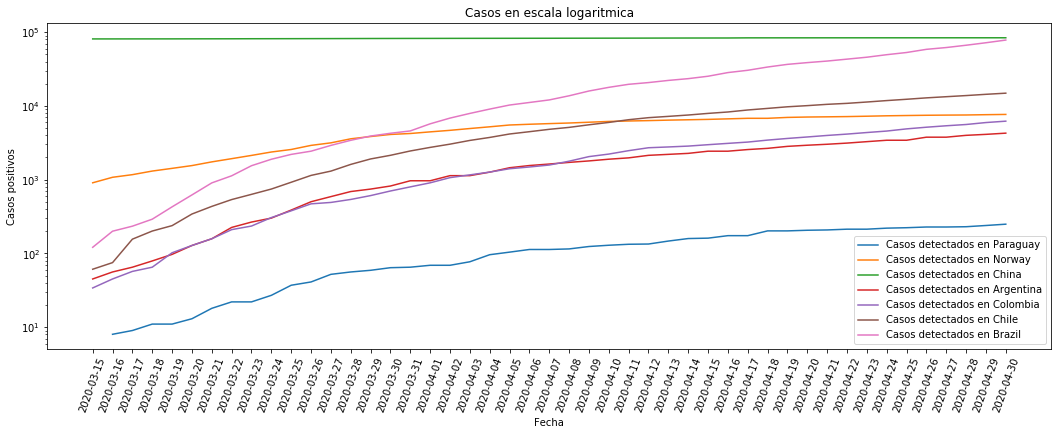

In [353]:
#3ro
#Pedir al usuario ingresar n países y gráficar para dichos países la cantidad de casos en una escala logaritmica. 
#El programa debe pedirle al usuario el intervalo de tiempo

graficar_paises(['Paraguay','Norway','China','Argentina','Colombia','Chile','Brazil'],'2020-03-15', '2020-04-30')

In [ ]:
""" Muchas gracias por la oportunidad """